In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
#loading the data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Italy', 'Germany', 'United Kingdom', 'US', 'France', 'China', 'Spain', 'India', 'Russia', 'Iran']
df = df[df['Country'].isin(countries)]

df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [3]:
#latest data
df.tail(10)


,Date,Country,Confirmed,Recovered,Deaths,Cases
17056,2020-04-23,China,83884,77983,4636,166503
17081,2020-04-23,France,158303,42762,21889,222954
17085,2020-04-23,Germany,153129,103300,5575,262004
17098,2020-04-23,India,23077,5012,721,28810
17100,2020-04-23,Iran,87026,64843,5481,157350
17104,2020-04-23,Italy,189973,57576,25549,273098
17158,2020-04-23,Russia,62773,4891,555,68219
17176,2020-04-23,Spain,213024,89250,22157,324431
17191,2020-04-23,US,869170,80203,49954,999327
17195,2020-04-23,United Kingdom,139246,712,18791,158749


In [4]:
df1 = df.copy()


In [5]:
# Restructuring the Data
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

Text(2020-01-23 00:00:00, 1039327, 'For China, France, Germany, India, Iran, Italy, Russia, Spain, United Kingdom and USA')

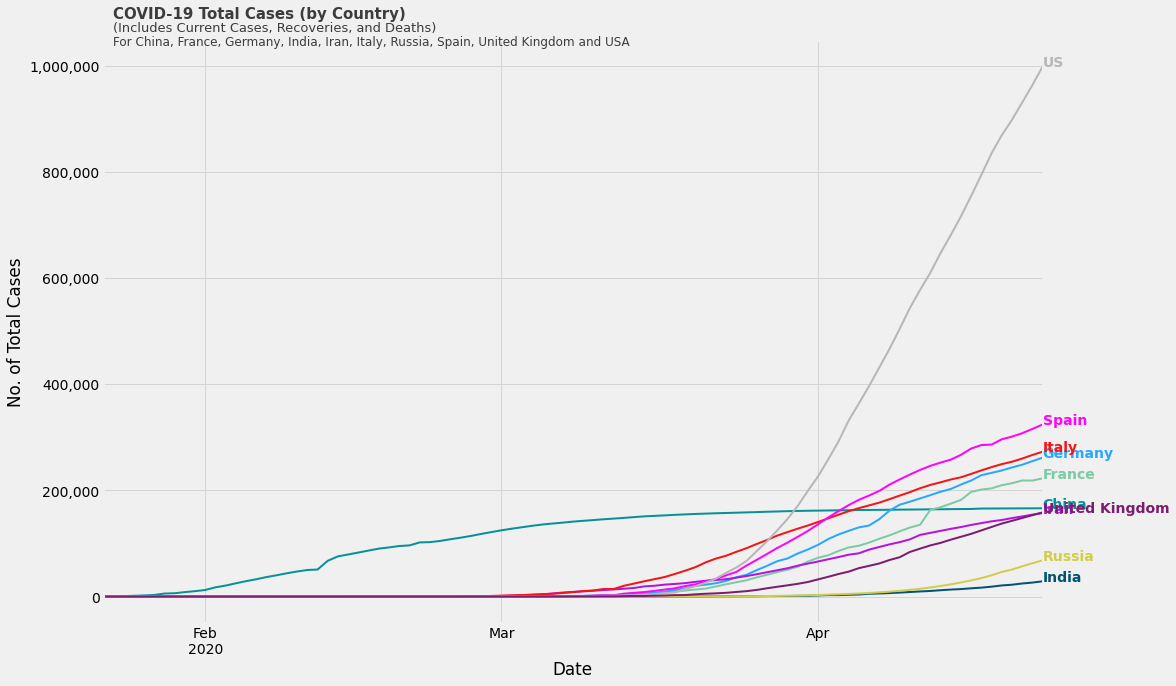

In [6]:

colors = {'China':'#089099', 'France':'#7CCBA2', 'Germany':'#26a8ff', 'India':'#045275', 'Iran':'#b414e0','Italy':'#f71414','Russia':'#d1cd4b','Spain':'#ff03fb', 'US':'#bab5b7', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

#plotting Total cases(by country)
plot = covid.plot(figsize=(15,10),color=list(colors.values()), linewidth=2, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('No. of Total Cases')


for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')
    

    
plot.text(x = covid.index[1], y = int(covid.max().max())+90000, s = "COVID-19 Total Cases (by Country)", fontsize =15 , weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+65000, s = "(Includes Current Cases, Recoveries, and Deaths)", fontsize =13 , alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+40000, s = "For China, France, Germany, India, Iran, Italy, Russia, Spain, United Kingdom and USA", fontsize = 12, alpha = .75)



In [7]:
#confirmed cases
df_confirmed = df1.pivot(index='Date', columns='Country', values='Confirmed')
countries = list(df_confirmed.columns)

In [8]:
covid_c = df_confirmed.reset_index('Date')
covid_c.set_index(['Date'], inplace=True)
covid_c.columns = countries

Text(2020-01-23 00:00:00, 909170, 'For China, France, Germany, India, Iran, Italy, Russia, Spain, United Kingdom and USA')

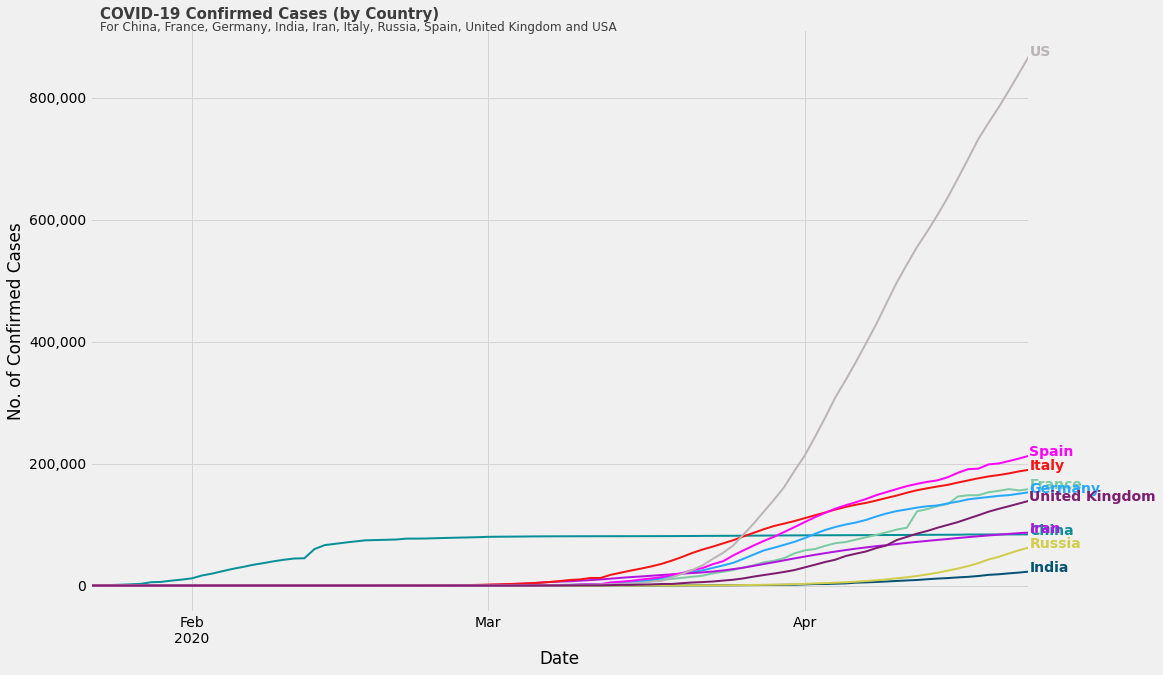

In [9]:
#plotting confirmed cases
plot = covid_c.plot(figsize=(15,10),color=list(colors.values()), linewidth=2, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('No. of Confirmed Cases')


for country in list(colors.keys()):
    plot.text(x = covid_c.index[-1], y = covid_c[country].max(), color = colors[country], s = country, weight = 'bold')
    

    
plot.text(x = covid_c.index[1], y = int(covid_c.max().max())+60000, s = "COVID-19 Confirmed Cases (by Country)", fontsize =15 , weight = 'bold', alpha = .75)

plot.text(x = covid_c.index[1], y = int(covid_c.max().max())+40000, s = "For China, France, Germany, India, Iran, Italy, Russia, Spain, United Kingdom and USA", fontsize = 12, alpha = .75)

In [10]:
#death cases
df_death = df1.pivot(index='Date', columns='Country', values='Deaths')
countries = list(df_death.columns)

covid_d = df_death.reset_index('Date')
covid_d.set_index(['Date'], inplace=True)
covid_d.columns = countries

Text(2020-01-23 00:00:00, 50954, 'For China, France, Germany, India, Iran, Italy, Russia, Spain, United Kingdom and USA')

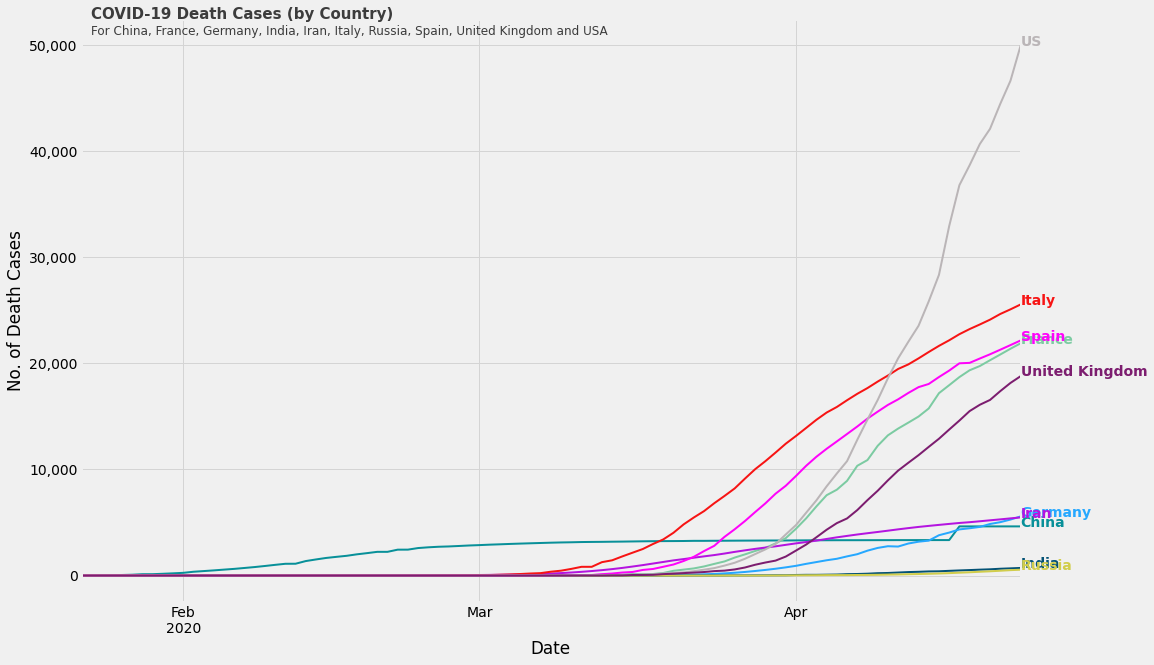

In [11]:
#plotting death cases
plot = covid_d.plot(figsize=(15,10),color=list(colors.values()), linewidth=2, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('No. of Death Cases')


for country in list(colors.keys()):
    plot.text(x = covid_d.index[-1], y = covid_d[country].max(), color = colors[country], s = country, weight = 'bold')
    

    
plot.text(x = covid_d.index[1], y = int(covid_d.max().max())+2500, s = "COVID-19 Death Cases (by Country)", fontsize =15 , weight = 'bold', alpha = .75)

plot.text(x = covid_d.index[1], y = int(covid_d.max().max())+1000, s = "For China, France, Germany, India, Iran, Italy, Russia, Spain, United Kingdom and USA", fontsize = 12, alpha = .75)

In [12]:
#per capita

populations = {'India': 1380004385, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228, 'Russia':145934462, 'Iran': 83992949 , 'Italy': 60461826 , 'Spain':46754778 }
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

Text(2020-01-23 00:00:00, 728.8991347579492, 'For China, France, Germany, India, Iran, Italy, Russia, Spain, United Kingdom and USA')

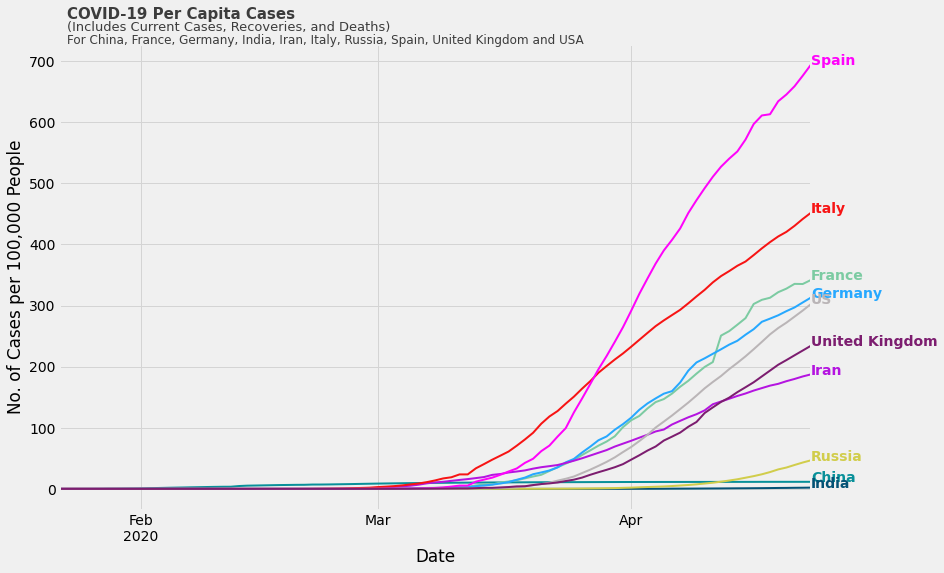

In [13]:


percapita_plot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=2, legend=False)
percapita_plot.grid(color='#d4d4d4')
percapita_plot.set_xlabel('Date')
percapita_plot.set_ylabel('No. of Cases per 100,000 People')
for country in list(colors.keys()):
    percapita_plot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')


percapita_plot.text(x = percapita.index[1], y = percapita.max().max()+75, s = "COVID-19 Per Capita Cases", fontsize = 15, weight = 'bold', alpha = .75)
percapita_plot.text(x = percapita.index[1], y = percapita.max().max()+55, s = "(Includes Current Cases, Recoveries, and Deaths)", fontsize =13 , alpha = .75)
percapita_plot.text(x = percapita.index[1], y = percapita.max().max()+35, s = "For China, France, Germany, India, Iran, Italy, Russia, Spain, United Kingdom and USA", fontsize = 12, alpha = .75)
